# Імпортуємо бібліотеки і читаємо дані

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [19]:
df = pd.read_csv("data.txt", header=None, names=['x'])
sample = list(df['x'])
print(df.shape)
df.head(10)

(302, 1)


,x
0,9
1,14
2,6
3,6
4,9
5,14
6,2
7,4
8,8
9,13


# Розрахунки
Розрахувати:
- варіаційний ряд для простої вибірки;
- інтервальний варіаційний ряд для згрупованої вибірки;
- числові характеристики вибірки.

Будуємо варіаційний ряд для простої вибірки, а також порахуємо кілкьість входжень кожного значення у вибірку: перша колонка - значення із вибірки, друга - кількість входжень

In [21]:
sample.sort()
print(sample)

[-2, -2, -1, -1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 

In [22]:
df['x'].value_counts().sort_index()

-2      2
-1      2
 0      5
 1     10
 2     12
 3     18
 4     22
 5     20
 6     22
 7     18
 8     23
 9     27
 10    11
 11    18
 12    24
 13    13
 14    11
 15    10
 16     7
 17    10
 18     7
 19     4
 20     2
 21     2
 22     2
Name: x, dtype: int64

- інтервальний варіаційний ряд для згрупованої вибірки;

Будуємо інтервальний варіаційний ряд для вибірки. Для цього всю вибірку ділимо на 10 рівних інтервалів між мінімальним та максимальним значенням вибірку і знаходимо кількість елементів вибірки, які потряплять в інтервал. Виводимо межі інтервалів і кількість входжень елементів.

In [26]:
hist, bin_edges = np.histogram(sample, bins = 10, density=False)
print(bin_edges)
print(hist)

[-2.   0.4  2.8  5.2  7.6 10.  12.4 14.8 17.2 19.6 22. ]
[ 9 22 60 40 50 53 24 27 11  6]


In [33]:
df_hist = pd.DataFrame(columns=['Interval', 'Count'])
for i in range(len(hist)):
    df_hist = df_hist.append({'Interval': "[" + str(np.around(bin_edges[i])) + ";" + str(np.around(bin_edges[i + 1])) + "]", 'Count': hist[i]}, ignore_index = True)
df_hist

,Interval,Count
0,[-2.0;0.0],9
1,[0.0;3.0],22
2,[3.0;5.0],60
3,[5.0;8.0],40
4,[8.0;10.0],50
5,[10.0;12.0],53
6,[12.0;15.0],24
7,[15.0;17.0],27
8,[17.0;20.0],11
9,[20.0;22.0],6


- числові характеристики вибірки.

Обчислимо числові характеристики вибірки, включаючи:

- моду
- медіану (квантіль 50%)
- математичне сподівання (mean)
- дисперсію
- середньоквадратичне відхилення (std)
- мінімальне, максимальне значення вибірки (min, max)
- розмах вибірки
- квантілі вибірки (25%, 50%, 75%)

Частину характеристик можна отримати за допомогою функції descibe().

In [34]:
df.describe()

,x
count,302.000000
mean,8.721854
std,5.097923
min,-2.000000
25%,5.000000
50%,8.000000
75%,12.000000
max,22.000000


In [42]:
print("Mode: " + str(df['x'].mode()[0]) + "; Variance: " + str(df['x'].std() ** 2) + "; Range: " + str(df['x'].max() - df['x'].min()))

Mode: 9; Variance: 25.988823128204; Range: 24


# Побудова гістограми
Побудувати для згрупованої вибірки:
- гістограму частот;
- емпіричну функцію розподілу.

Зробити висновок про інформативність гістограми частот при різній кількості інтервалів групування (дослідити 3-4 варіанти).
Висновок: можемо помітити, що інформативність гістограми падає по мірі зменшення кількісті інтервалів, адже при цьому дані свого роду дещо усереднюються.

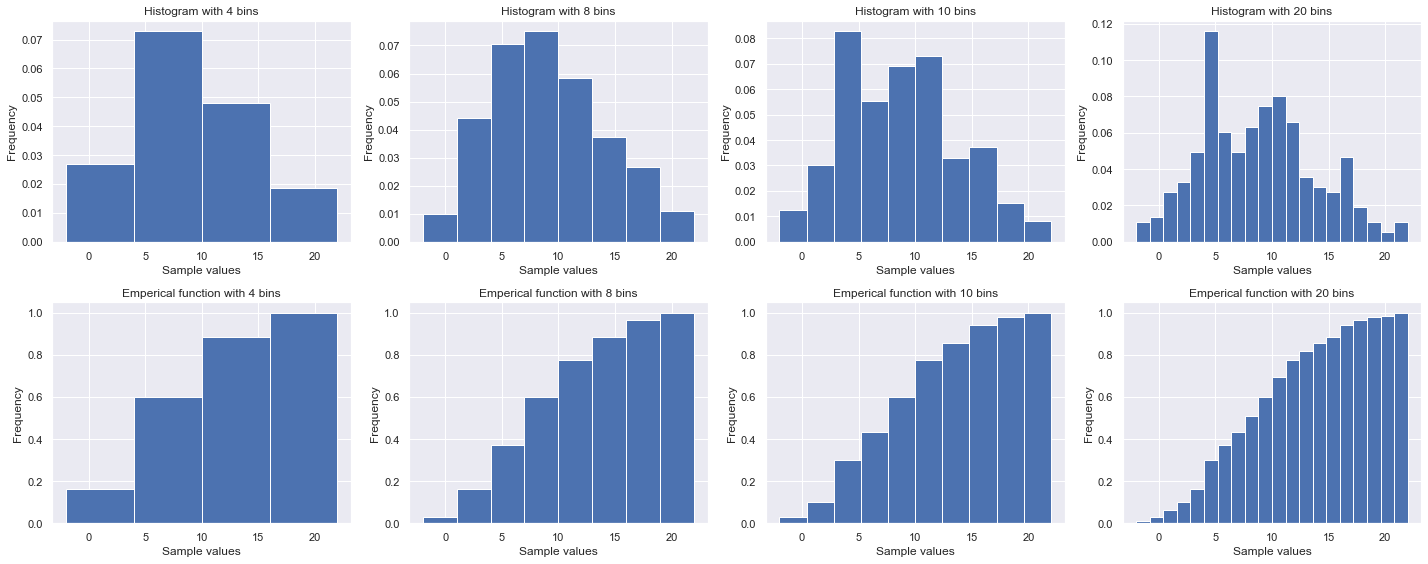

In [68]:
bins_count = [4, 8, 10, 20]
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
for i, bins in enumerate(bins_count):
    ax = axs[0, i]
    df['x'].hist(bins = bins, density = True, ax = ax)
    ax.set_title('Histogram with ' + str(bins) + ' bins')
    ax.set_xlabel("Sample values")
    ax.set_ylabel("Frequency")
    
    ax = axs[1, i]
    df['x'].hist(bins = bins, density = True, cumulative = True, ax = ax)
    ax.set_title('Emperical function with ' + str(bins) + ' bins')
    ax.set_xlabel("Sample values")
    ax.set_ylabel("Frequency")
plt.tight_layout()

# Додаткове завдання
- Скачати дані із файлу Data1.csv 
- дослідити їх структуру
- вивести перші 5 рядків
- вивести останні 6 рядків
- видалити стовпчик з абревіатурами
- додати стовпчик з повним GDP, пропуски замінити нулями
- вивести все summary
- побудувати діаграму розмаху для GDP per capita
- побудувати графік залежності High-technology exports від GDP

In [142]:
df = pd.read_csv("Data1.csv", delimiter=';')
df = df.replace(r'^\s*$', np.nan, regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country                  136 non-null    object
 1   ISO                      136 non-null    object
 2   Conflicts intencity      136 non-null    int64 
 3   Hospital beds            97 non-null     object
 4   High-technology exports  132 non-null    object
 5   GDP per capita           136 non-null    int64 
 6   Population               136 non-null    object
dtypes: int64(2), object(5)
memory usage: 7.6+ KB


In [143]:
df.head(5)

,Country,ISO,Conflicts intencity,Hospital beds,High-technology exports,GDP per capita,Population
0,Albania,ALB,0,"2,6",15123662,3266790,11926892453
1,Algeria,DZA,3,NaN,2449466,26554329,"1,5608E+11"
2,Angola,AGO,3,NaN,NaN,12553446,89633156470
3,Argentina,ARG,1,"4,7",1442450760,33193918,"5,45866E+11"
4,Armenia,ARM,3,"3,9",16565073,3505251,10547331235


In [144]:
df.tail(6)

,Country,ISO,Conflicts intencity,Hospital beds,High-technology exports,GDP per capita,Population
130,United States,USA,3,"2,9","1,53526E+11",252981000,"1,85691E+13"
131,Uruguay,URY,0,"2,5",266119238,3132050,52419720714
132,"Venezuela, Bolivarian Republic of",VEN,3,"0,9",18092984,20332079,"3,71006E+11"
133,Viet Nam,VNM,3,NaN,38735943417,67242400,"2,02616E+11"
134,Yemen,YEM,5,"0,7",2946931,12661614,27317605346
135,Zambia,ZMB,0,NaN,36503179,8239732,19551093303


In [145]:
df = df.drop(['ISO'], axis=1)
df.head()

,Country,Conflicts intencity,Hospital beds,High-technology exports,GDP per capita,Population
0,Albania,0,"2,6",15123662,3266790,11926892453
1,Algeria,3,NaN,2449466,26554329,"1,5608E+11"
2,Angola,3,NaN,NaN,12553446,89633156470
3,Argentina,1,"4,7",1442450760,33193918,"5,45866E+11"
4,Armenia,3,"3,9",16565073,3505251,10547331235


In [146]:
col = 'Population'
df[col] = df[col].apply(lambda x: x.replace(',','.'))
df[col] = pd.to_numeric(df[col])
col = 'Hospital beds'
df[col] = df[col].apply(lambda x: x.replace(',','.') if not pd.isnull(x) else x)
df[col] = pd.to_numeric(df[col])
col = 'High-technology exports'
df[col] = df[col].apply(lambda x: x.replace(',','.') if not pd.isnull(x) else x)
df[col] = pd.to_numeric(df[col])

In [147]:
df['GDP'] = df['GDP per capita'] * df['Population']
df.head()

,Country,Conflicts intencity,Hospital beds,High-technology exports,GDP per capita,Population,GDP
0,Albania,0,2.6,1.512366e+07,3266790,1.192689e+10,3.896265e+16
1,Algeria,3,NaN,2.449466e+06,26554329,1.560800e+11,4.144600e+18
2,Angola,3,NaN,NaN,12553446,8.963316e+10,1.125205e+18
3,Argentina,1,4.7,1.442451e+09,33193918,5.458660e+11,1.811943e+19
4,Armenia,3,3.9,1.656507e+07,3505251,1.054733e+10,3.697104e+16


In [150]:
df['GDP'].isnull().any()

False

In [151]:
df.describe()

,Conflicts intencity,Hospital beds,High-technology exports,GDP per capita,Population,GDP
count,136.000000,97.000000,1.320000e+02,1.360000e+02,1.360000e+02,1.360000e+02
mean,1.977941,3.262784,1.560629e+10,3.725446e+07,5.362308e+11,1.632076e+20
std,1.532207,2.361924,5.609349e+10,1.272781e+08,1.941314e+12,1.184000e+21
min,0.000000,0.100000,0.000000e+00,7.043900e+04,9.645992e+08,1.005393e+14
25%,0.000000,1.300000,1.468869e+07,3.502713e+06,1.382807e+10,5.515877e+16
50%,3.000000,2.600000,1.932256e+08,8.345330e+06,5.240744e+10,4.559736e+17
75%,3.000000,4.800000,3.990518e+09,2.329577e+07,2.989508e+11,4.711841e+18
max,5.000000,11.300000,5.542730e+11,1.150780e+09,1.856910e+13,1.288770e+22


<AxesSubplot:>

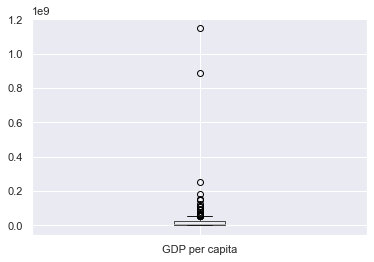

In [158]:
df.boxplot(column=['GDP per capita'])  

Бачимо, що дані містять доволі багато викидів, тому обмежимо дану колонку в межах від 5% до 95% квантилів і побудуємо розмах даної колонки. Отриманий результат дещо кращий.

<AxesSubplot:>

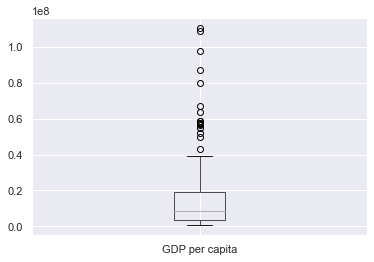

In [162]:
col = 'GDP per capita'
ps = np.percentile(df[col], [5, 95])
df2 = df[(df[col] > ps[0]) & (df[col] < ps[1])]
df2.boxplot(column=[col])  

Text(0, 0.5, 'High-technology exports')

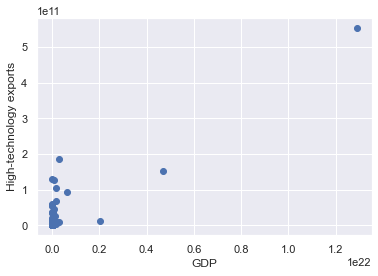

In [155]:
plt.scatter(df['GDP'], df['High-technology exports'])
plt.xlabel('GDP')
plt.ylabel('High-technology exports')

Бачимо, що дані містять викиди, тому основні дані важко аналізувати, адже вони скупчені в групку, тому обмежимо колонку 'GDP' в межах від 5% до 95% квантилів і побудуємо розмах даної колонки. Отриманий результат дещо кращий.

Text(0, 0.5, 'High-technology exports')

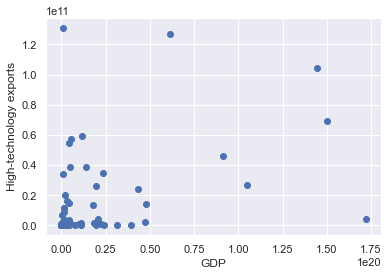

In [165]:
col = 'GDP'
ps = np.percentile(df[col], [5, 95])
df2 = df[(df[col] > ps[0]) & (df[col] < ps[1])]
plt.scatter(df2['GDP'], df2['High-technology exports'])
plt.xlabel('GDP')
plt.ylabel('High-technology exports')

# Висновки:
В основному завданні ми побудували варіаційний ряд та порахували основні описові характеристики, що дало загальне уявлення про вибірку. 
Побудувавши гістограму з різною кількістю інтервалів ми помітили, що дані згладжуються при меншій кількості інтервалів, адже вони вирівнюються.

У додатковому завданні ми переглянули дані і помітили, що частина з них пропущена. 
Також ми перевели рядкові колонки у числові і порахували нову колонку на основі попередніх.
Також ми побудували розмір вибірки і залежність між 2 колонками, проте оскільки дані містять викиди, то отримані графіки були не дуже інформативними, тому після того, як кількість викидів було зменшено, аналогічні графіки вийшли кращими.